# **Εργασία 1 - Επιβλεπόμενη Μάθηση**

Ονοματεπώνυμο: Ευθυμιάδης Κωνσταντίνος <br>
ΑΕΜ: 240

## Μέρος 1 - Λογιστική Παλινδρόμηση

### Πρώτο Ερώτημα

#### Εισαγωγή Βιβλιοθηκών

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#### Εισαγωγή Δεδομένων

In [2]:
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


#### Περιγραφή Χαρακτηριστηκών με Μέση Τιμή, Τυπική Απόκλιση, Ελάχιστη και Μέγιστη Τιμή

In [3]:
df.describe().loc[['mean', 'std', 'min', 'max']]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### Δημιουργία Ιστογράμματος για κάθε χαρακτηριστικό

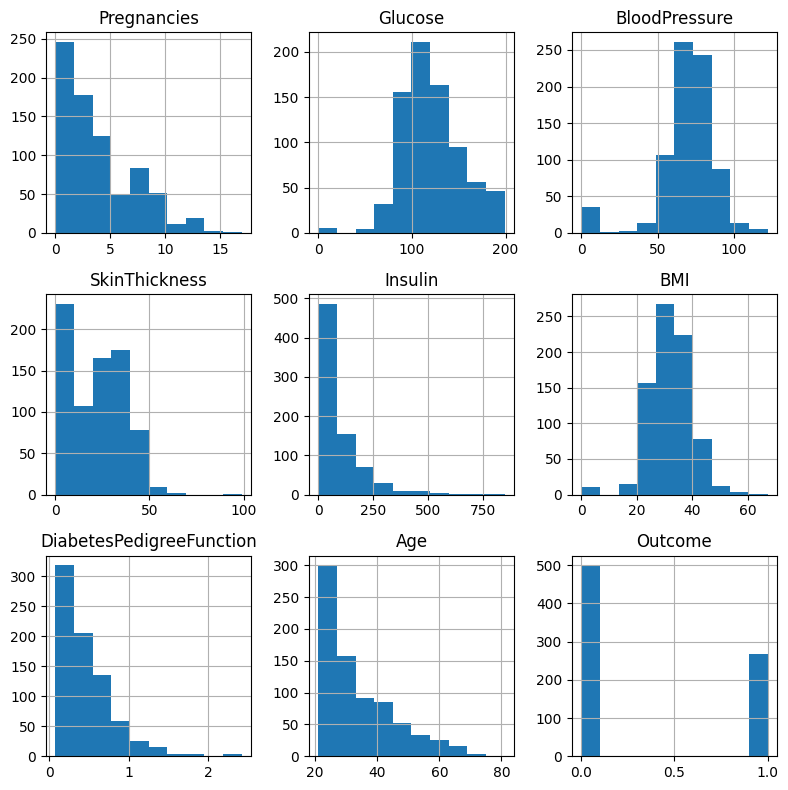

In [4]:
df.hist(figsize=(8,8))
plt.tight_layout()
plt.show()

#### Δημιουργία Ραβδογράμματος για το χαρακτηριστικό Outcome

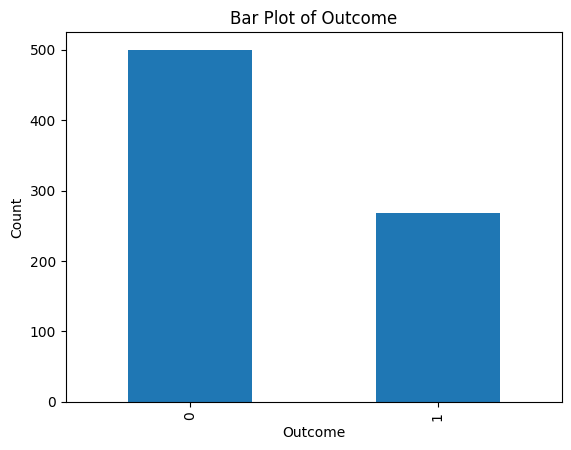

In [5]:
counts_of_0_and_1_at_outcome= df['Outcome'].value_counts()
counts_of_0_and_1_at_outcome.plot(kind='bar')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.title('Bar Plot of Outcome')
plt.show()

### Δεύτερο Ερώτημα

Η ποιότητα των δεδομένων δεν είναι καλή.<br>
<br>
1. Παρατηρούνται αρκετές μηδενικές τιμές σε χαρακτηριστικά που δεν είναι δυνατόν να έχουν τέτοια τιμή (BMI, Insulin, Glucose, BloodPresure, SkinThickness). Αυτό έχει ως απότελεσμα, τα δεδομένα είτε να μην είναι αξιόπιστα είτε να είναι ελλιπή.
2. Σύμφωνα με τα διαγράμματα, η στήλη Outcome έχει αρκετά περισσότερα δεδομένα με τιμή 0 (μη-διαβητικοί). Αποτέλεσμα αυτού είναι η δημιουργία ανισορροπίας, διατρέχοντας κίνδυνο να μειωθεί η απόδοση του μοντέλου.

### Τρίτο Ερώτημα

Σύμφωνα με το ιστόγραμμα, παρατειρείται ότι η μεταβλητή Age ακολουθεί μια εκθετική κατανομή (μεγάλο πλήθος τιμών στις μικρές ηλικίες και μείωση των τιμών όσο αυξάνεται η ηλικία), πράγμα που σημαίνει ότι οι περισσότεροι ασθενείς είναι νεαρής ηλικίας.
<br><br>
Η εκθετική κατανομή δεν είναι ιδανική για την κατασκευή αυτής της εφαρμογής, καθώς τα δεδομένα δεν είναι κατανεμημένα συμμετρικά. Με αυτά τα δεδομένα, η κατασκευή ενός γενικού μοντέλου πρόβλεψης διαβήτη διατρέχει μεγάλο κίνδυνο σφάλματος, κυρίως για τις μεγαλύτερες ηλικιακές ομάδες.

### Τέταρτο Ερώτημα

#### Επιλογή των 100 ασθενών με την μεγαλύτερη ποσότητα γλυκόζης

In [6]:
number_of_people_with_max_glucose= 100
top_with_glucose= df[['Glucose', 'Outcome']].sort_values(by='Glucose', ascending=False).head(number_of_people_with_max_glucose)
top_with_glucose

,Glucose,Outcome
661,199,1
561,198,1
579,197,1
228,197,0
8,197,1
...,...,...
660,162,0
681,162,1
120,162,1
294,161,0


#### Ποσοστό των παραπάνω 100 ασθενών με διαβήτη

In [7]:
with_diabete= (top_with_glucose['Outcome'] == 1).sum()
percentage_of_diabetes= 100*with_diabete/number_of_people_with_max_glucose

print("Το ποσοστό εμφάνισης διαβήτη για τους " + str(number_of_people_with_max_glucose) + " ασθενείς με την μεγαλύτερη ποσότητα γλυκόζης είναι: " + str(percentage_of_diabetes) +"%")

Το ποσοστό εμφάνισης διαβήτη για τους 100 ασθενείς με την μεγαλύτερη ποσότητα γλυκόζης είναι: 82.0%


Με βάση το παραπάνω ποσοστό γίνεται αντιληπτό, ότι τα άτομα με υψηλά επίπεδα γλυκόζης στο αίμα είναι πολύ πιθανό να εμφανίσουν διαβήτη

### Πέμπτο Ερώτημα

#### Μετατροπή DataFrama σε Numpy arrays

In [8]:
input_df= df.drop(columns=['Outcome'])
targets_df= df['Outcome']

x= input_df.to_numpy()
y= targets_df.to_numpy()

x.shape, y.shape

((768, 8), (768,))

#### Διαχωρισμός των Δεδομένων σε σύνολα Eκπαίδευσης-Eπικύρωσης

In [9]:
seed= 0
test_size= 0.3

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=test_size, random_state=seed)

#### Πλήθος Παραδειγμάτων Εκπαίδευσης και Επικύρωσης

In [10]:
print("Training Examples: " + str(len(x_train)))
print("Validation Examples: " + str(len(x_test)))

Training Examples: 537
Validation Examples: 231


### Έκτο Ερώτημα

#### Δημιουργία και Εκπαίδευση του Logistic Regression

In [11]:
model= LogisticRegression(max_iter= 1000, random_state= seed)
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000, random_state=0)

#### Μέτρηση Ακρίβειας στο σύνολο Test

In [12]:
y_pred_at_test_set= model.predict(x_test)

accuracy_at_test_set= accuracy_score(y_test, y_pred_at_test_set)
accuracy_at_test_set= round(accuracy_at_test_set*100, 2)
print("Ακρίβεια στο σύνολο test: " + str(accuracy_at_test_set) + "%")

Ακρίβεια στο σύνολο test: 77.92%


#### Μέτρηση Ακρίβειας στο σύνολο Train

In [13]:
y_pred_at_train_set= model.predict(x_train)

accuracy_at_train_set= accuracy_score(y_train, y_pred_at_train_set)
accuracy_at_train_set= round(accuracy_at_train_set*100, 2)
print("Ακρίβεια στο σύνολο train: " + str(accuracy_at_train_set) + "%")

Ακρίβεια στο σύνολο train: 76.54%


Παρατηρείται ότι η ακρίβεια είναι περίπου η ίδια μεταξύ του training set (76.54%) και του testing set (77.92%). Το training set δεν έχει πάρα πολύ μεγάλη ακρίβεια, πράγμα που σημαίνει ότι το μοντέλο δεν έχει κάνει overfitting στα δεδομένα.

### Έβδομο Ερώτημα

#### Δημιουργία Ηλικιακών Ομάδων

In [14]:
age_index= 7

mask_under_25= x_test[:, age_index] < 25
mask_over_25_and_under_50= (x_test[:, age_index] >= 25) & (x_test[:, age_index] < 50)
mask_over_50= x_test[:, age_index] >= 50

In [15]:
x_test_under_25= x_test[mask_under_25]
y_test_under_25= y_test[mask_under_25]

x_test_over_25_and_under_50= x_test[mask_over_25_and_under_50]
y_test_over_25_and_under_50= y_test[mask_over_25_and_under_50]

x_test_over_50= x_test[mask_over_50]
y_test_over_50= y_test[mask_over_50]

#### Πρόβλεψη για κάθε μία ηλικιακή ομάδα

In [16]:
y_pred_under_25= model.predict(x_test_under_25)
y_pred_over_25_and_under_50= model.predict(x_test_over_25_and_under_50)
y_pred_over_50= model.predict(x_test_over_50)

#### Υπολογισμός Ακρίβειας για κάθε ηλικιακή ομάδα

In [17]:
accuracy_under_25= accuracy_score(y_test_under_25, y_pred_under_25)
accuracy_over_25_and_under_50= accuracy_score(y_test_over_25_and_under_50, y_pred_over_25_and_under_50)
accuracy_over_50= accuracy_score(y_test_over_50, y_pred_over_50)

accuracies_for_ages= [accuracy_under_25, accuracy_over_25_and_under_50, accuracy_over_50]

#### Δημιουργία Ραβδογράμματος

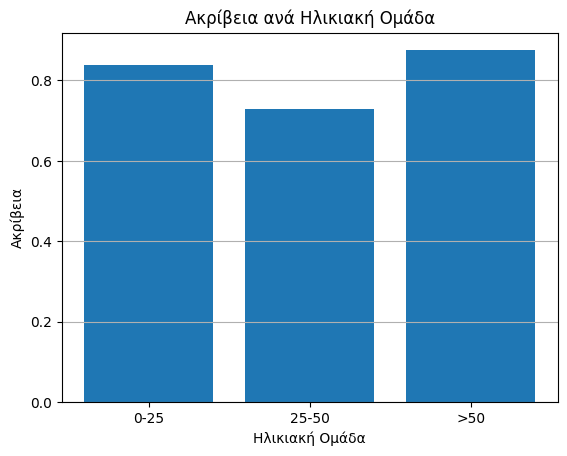

In [18]:
labels= ['0-25', '25-50', '>50']

plt.bar(labels, accuracies_for_ages)
plt.title("Ακρίβεια ανά Ηλικιακή Ομάδα")
plt.xlabel("Ηλικιακή Ομάδα")
plt.ylabel("Ακρίβεια")
plt.grid(axis='y')

plt.show()


Ο ταξινομητής δεν λειτουργεί το ίδιο καλά για όλες τις ηλικιακές ομάδες. Πιο συγκεκριμένα, για την ηλικιακή ομάδα 25-50 δεν λειτουργεί τόσο καλά όσο για τις νεαρές ηλικίες (0-25) και ηλικιωμένων (>50).

### Όγδοο Ερώτημα

Χειρότερο είναι ο ταξινομητής να δείχνει ότι κάποιος ασθενής δεν έχει διαβήτη, ενώ στην πραγματικότητα έχει (false-negative). Λόγω αυτού, ο ασθενής μπορεί να μην λάβει τις απαραίτητες ιατρικές παρεμβάσεις θέτοντας την ζωή του σε κίνδυνο.

### Ένατο Ερώτημα

In [19]:
accuracies_with_different_seed= []
test_size= 0.3

for seed in range(10):
  x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=test_size, random_state=seed)

  model= LogisticRegression(max_iter= 1000, random_state= seed)
  model.fit(x_train, y_train)

  y_pred= model.predict(x_test)
  temp_accuracy= accuracy_score(y_test, y_pred)

  accuracies_with_different_seed.append(temp_accuracy)


#### Υπολογισμός Μέσου Όρου και Τυπικής Απόκλισης

In [20]:
mean_of_accuracies_with_different_seed= np.mean(accuracies_with_different_seed)
mean_of_accuracies_with_different_seed= round(mean_of_accuracies_with_different_seed, 2)

std_of_accuracies_with_different_seed= np.std(accuracies_with_different_seed)
std_of_accuracies_with_different_seed= round(std_of_accuracies_with_different_seed, 2)

print("Μέσος Όρος Ακρίβειας: " + str(mean_of_accuracies_with_different_seed))
print("Τυπική Απόκλιση Ακρίβειας: " + str(std_of_accuracies_with_different_seed))

Μέσος Όρος Ακρίβειας: 0.77
Τυπική Απόκλιση Ακρίβειας: 0.02


### Δέκατο Ερώτημα

Κανονικοποίηση των Δεδομένων εκτός από την μεταβλητή Outcome

In [21]:
features= df.drop(columns='Outcome')
df[features.columns]= (features - features.min()) / (features.max() - features.min())

df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1
...,...,...,...,...,...,...,...,...,...
763,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,0.700000,0
764,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000,0
765,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,0.150000,0
766,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333,1


#### Εύρεση Τριών σημαντικότερων παραγόντων

Όσο μεγαλύτερη η απόλυτη τιμή του weight ενός feature, τόσο πιο σημαντικό είναι

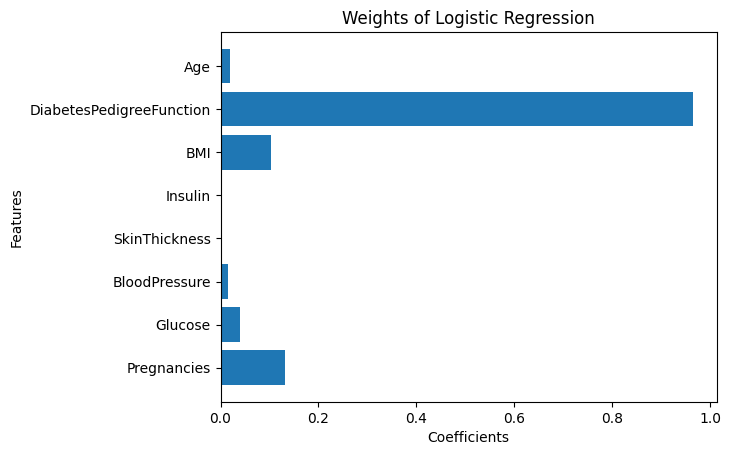

In [22]:
coeffs= model.coef_[0]
weights= np.abs(coeffs)

features.columns
labels= features.columns

plt.barh(labels, weights)
plt.title("Weights of Logistic Regression")
plt.xlabel("Coefficients")
plt.ylabel("Features")

plt.show()

Με βάση το παραπάνω διάγραμμα, φαίνεται ότι οι τρεις πιο σημαντικοί παράγοντες είναι οι εξής:
<br>

 <ol>
  <li>DiabetesPedigreeFunction</li>
  <li>Pregnacies</li>
  <li>BMI</li>
</ol>

## Μέρος 2 - Γραμμική Παλινδρόμηση

### Πρώτο Ερώτημα

#### Εισαγωγή Βιβλιοθηκών

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error

#### Εισαγωγή Δεδομένων

In [24]:
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


#### Δημιουργία Numpy Arrays

In [25]:
input_df= df[['Pregnancies', 'BloodPressure', 'BMI', 'Age']]
targets_df= df['Glucose']

x= input_df.to_numpy()
y= targets_df.to_numpy()

x.shape, y.shape

((768, 4), (768,))

#### Διαχωρισμός Δεδομένων σε σύνολα εκπαίδευσης και επικύρωσης

In [26]:
seed= 0
test_size= 0.3

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= test_size, random_state= seed)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((537, 4), (231, 4), (537,), (231,))

### Δεύτερο Ερώτημα

#### Δημιουργία και Εκπαίδευση του Linear Regression

In [27]:
model= LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

#### Μέτρηση ακρίβειας

In [28]:
y_pred= model.predict(x_test)

mse= mean_squared_error(y_test, y_pred)
mse= round(mse, 2)

mae= mean_absolute_error(y_test, y_pred)
mae= round(mae, 2)

print("MSE= " + str(mse))
print("MAE= " + str(mae))

MSE= 929.89
MAE= 23.6


#### Επιλογή Κατάλληλης Μετρικής

Η MAE είναι καταλληλότερη μετρική από αυτήν της MSE στην συγκεκριμένη περίπτωση, διότι δεν δίνει έμφαση στις ακραίες τιμές. Έτσι, παρέχεται μια πιο αντιπροσωπευτική αποτίμηση του σφάλματος του μοντέλου.

### Τρίτο Ερώτημα

#### Δημιουργία και Εκπαίδευση του Lasso Regression

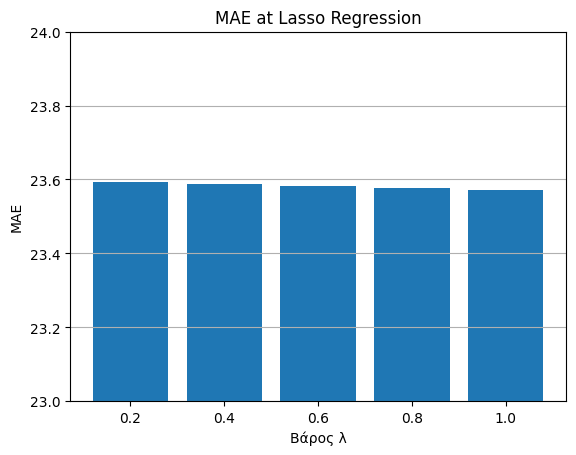

In [29]:
accuracies_for_Lasso= []

for tempInteger in range(2, 12, 2):
  lamdaWeight= tempInteger/10
  model= Lasso(alpha= lamdaWeight)
  model.fit(x_train, y_train)

  y_pred= model.predict(x_test)

  temp_mae= mean_absolute_error(y_test, y_pred)

  accuracies_for_Lasso.append(temp_mae)

labels= ['0.2', '0.4', '0.6', '0.8', '1.0']

plt.bar(labels, accuracies_for_Lasso)
plt.title("MAE at Lasso Regression")
plt.xlabel("Βάρος λ")
plt.ylabel("MAE")
plt.grid(axis='y')

min_for_y= round(min(accuracies_for_Lasso) - 1)
max_for_y= round(max(accuracies_for_Lasso) + 0.1)

plt.ylim(min_for_y, max_for_y)

plt.show()


Σύμφωνα με το διάγραμμα, καθώς αυξάνεται η τιμή του βάρους λ, το σφάλμα μειώνεται. Όσο αυξάνεται το λ, τόσο συυρικνώνονται οι συντελεστές, με αποτέλεσμα το μοντέλο να γίνεται πιο γενικό, μειώνοντας την υπερπροσαρμογή, ενώ επιπλέον όσο αυξάνεται η τιμή λ, απομακρύνει τις μεταβλητές με την λιγότερη σημαντικότητα.

### Τέταρτο Ερώτημα

#### Δημιουργία και Εκπαίδευση του Linear Regression

In [30]:
model= LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

#### Εύρεση του χαρακτηριστικού με την χαμηλότερη βαρύτητα

Όσο μικρότερη η απόλυτη τιμή του weight ενός feature, τόσο λιγότερο σημαντικό είναι

In [31]:
coeffs= model.coef_
weights= np.abs(coeffs)

min_weight= weights[0]
iter_min= 0
for i in range(1, 4):
  if weights[i] < min_weight:
    iter_min= i
    min_weight= weights[i]

temp_array= ['Pregnancies', 'BloodPressure', 'BMI', 'Age']

print('Το χαρακτηριστικό με την χαμηλότερη βαρύτητα είναι το : ' + temp_array[iter_min])

Το χαρακτηριστικό με την χαμηλότερη βαρύτητα είναι το : BloodPressure


#### Δημιουργία του Linear Regression model, χωρίς το BloodPressure

In [32]:
input_df= df[['Pregnancies', 'BMI', 'Age']]
targets_df= df['Glucose']

x= input_df.to_numpy()
y= targets_df.to_numpy()

seed= 0
test_size= 0.3

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= test_size, random_state= seed)

model= LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

#### Εύρεση MAE για το καινούργιο model

In [33]:
y_pred= model.predict(x_test)

mae= mean_absolute_error(y_test, y_pred)
mae= round(mae, 2)

print("MAE μετά την αφαίρεση του λιγότερου σημαντικού χαρακτηριστικού: " + str(mae))

MAE μετά την αφαίρεση του λιγότερου σημαντικού χαρακτηριστικού: 23.62


Μετά την αφαίρεση του λιγότερου σημαντικού χαρακτηριστικού το σφάλμα MAE αυξήθηκε ελαφρώς (από 23.6 σε 23.62). Αυτό σημαίνει ότι το χαρακτηριστικό έχει περιορισμένη συνεισφορά στην πρόβλεψη, με αποτέλεσμα η αφαίερεσή του να οδηγεί σε ένα πιο απλό μοντέλο, χωρίς όμως να επηρεάζεται σημαντικά η απόδοσή του.